In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def load_timings(csv_path):
    """Load the timings CSV into a pandas DataFrame."""
    df = pd.read_csv(csv_path)
    return df

def summarize_timings(df):
    """Print summary statistics for each algorithm and plot mean timings."""
    summary = df.groupby(['vertices', 'edges', 'bmssp'])['elapsed_seconds'].agg(['mean', 'std', 'min', 'max', 'count'])
    print(summary)
    return summary

def plot_mean_timings(df):
    """Plot mean elapsed time vs. number of edges for each algorithm."""
    df = df[df['vertices'] == 5000000]
    means = df.groupby(['edges', 'bmssp'])['elapsed_seconds'].mean().reset_index()
    for bmssp_val in means['bmssp'].unique():
        subset = means[means['bmssp'] == bmssp_val]
        plt.plot(subset['edges'], subset['elapsed_seconds'], marker='o', label=f'bmssp={bmssp_val}')
    plt.xlabel('Number of edges')
    plt.ylabel('Mean elapsed time (s)')
    plt.title('Mean elapsed time vs. edges')
    plt.legend()
    plt.show()

def plot_boxplot(df):
    """Boxplot of timings for each algorithm and edge count."""
    df['bmssp'] = df['bmssp'].astype(str)
    plt.figure(figsize=(12,6))
    df.boxplot(column='elapsed_seconds', by=['edges', 'bmssp'])
    plt.ylabel('Elapsed time (s)')
    plt.title('Timing distribution by edges and algorithm')
    plt.suptitle('')
    plt.show()

                            mean       std       min       max  count
vertices edges   bmssp                                               
1000000  1000000 False  0.031654  0.004573  0.022582  0.046439    100
                 True   0.032519  0.005069  0.023515  0.054420    100
         2000000 False  0.026358  0.005994  0.013544  0.041041    100
                 True   0.028393  0.005441  0.014905  0.044660    100
         3000000 False  0.025032  0.005406  0.012342  0.040421    100
                 True   0.030317  0.006246  0.008137  0.045582    100
         4000000 False  0.027757  0.004486  0.020206  0.037907    100
                 True   0.026971  0.005054  0.012167  0.036787    100
         5000000 False  0.029954  0.008651  0.018999  0.092043    100
                 True   0.027486  0.004387  0.016444  0.043785    100
2000000  1000000 False  0.052995  0.007744  0.039993  0.091302    100
                 True   0.052033  0.006505  0.036108  0.076634    100
         2000000 Fal

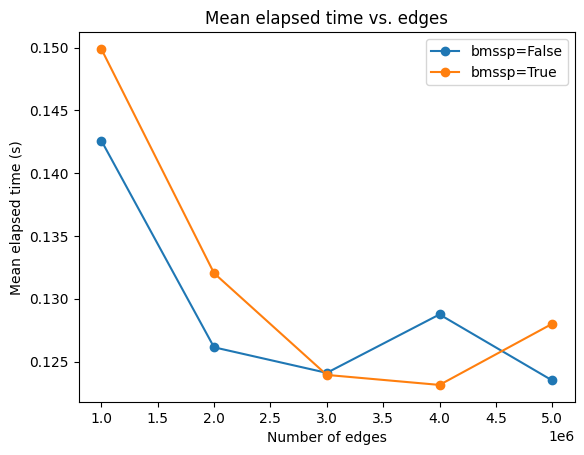

In [18]:
# Example usage:
df = load_timings('dijkstra_timings.csv')
summarize_timings(df)
plot_mean_timings(df)